# imports

In [1]:
import os
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from PIL import Image
from tqdm import tqdm
import random
import cv2

# matplotlib font 설정

In [2]:
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name][:3]

['NanumBarunGothic', 'Nanum Brush Script', 'NanumGothic Eco']

In [3]:
plt.rcParams["font.family"] = 'NanumBarunGothic'

# csv 파일 확인

In [4]:
base_dir = './data/dc/'

In [5]:
sample_sub = pd.read_csv(base_dir + 'sample_submission.csv')
test_df = pd.read_csv(base_dir + 'test.csv')

In [6]:
(sample_sub['id'] == test_df['id']).sum(), len(sample_sub)

(792, 792)

# test/train image path 생성

In [7]:
test_df['path'] = base_dir + test_df['img_path'].str[2:]
test_df

id        img_path                    path
0    TEST_000  ./test/000.png  ./data/dc/test/000.png
1    TEST_001  ./test/001.png  ./data/dc/test/001.png
2    TEST_002  ./test/002.png  ./data/dc/test/002.png
3    TEST_003  ./test/003.png  ./data/dc/test/003.png
4    TEST_004  ./test/004.png  ./data/dc/test/004.png
..        ...             ...                     ...
787  TEST_787  ./test/787.png  ./data/dc/test/787.png
788  TEST_788  ./test/788.png  ./data/dc/test/788.png
789  TEST_789  ./test/789.png  ./data/dc/test/789.png
790  TEST_790  ./test/790.png  ./data/dc/test/790.png
791  TEST_791  ./test/791.png  ./data/dc/test/791.png

[792 rows x 3 columns]

In [8]:
train_folder = glob(base_dir + 'train/*')

train_path = []
for folder in train_folder:
    tmp = glob(folder + '/*')
    train_path += tmp

In [9]:
train_df = pd.DataFrame(train_path, columns=['path'])
train_df['label'] = train_df['path'].apply(lambda x: x.split('/')[-2])
train_df

path label
0      ./data/dc/train/가구수정/0.png  가구수정
1      ./data/dc/train/가구수정/1.png  가구수정
2     ./data/dc/train/가구수정/10.png  가구수정
3     ./data/dc/train/가구수정/11.png  가구수정
4      ./data/dc/train/가구수정/2.png  가구수정
...                           ...   ...
3452   ./data/dc/train/훼손/995.png    훼손
3453   ./data/dc/train/훼손/996.png    훼손
3454   ./data/dc/train/훼손/997.png    훼손
3455   ./data/dc/train/훼손/998.png    훼손
3456   ./data/dc/train/훼손/999.png    훼손

[3457 rows x 2 columns]

In [10]:
train_df['label'].value_counts()

훼손         1405
오염          595
걸레받이수정      307
꼬임          210
터짐          162
곰팡이         145
오타공         142
몰딩수정        130
면불량          99
석고수정         57
들뜸           54
피스           51
창틀,문틀수정      27
울음           22
이음부불량        17
녹오염          14
가구수정         12
틈새과다          5
반점            3
Name: label, dtype: int64

# train label images

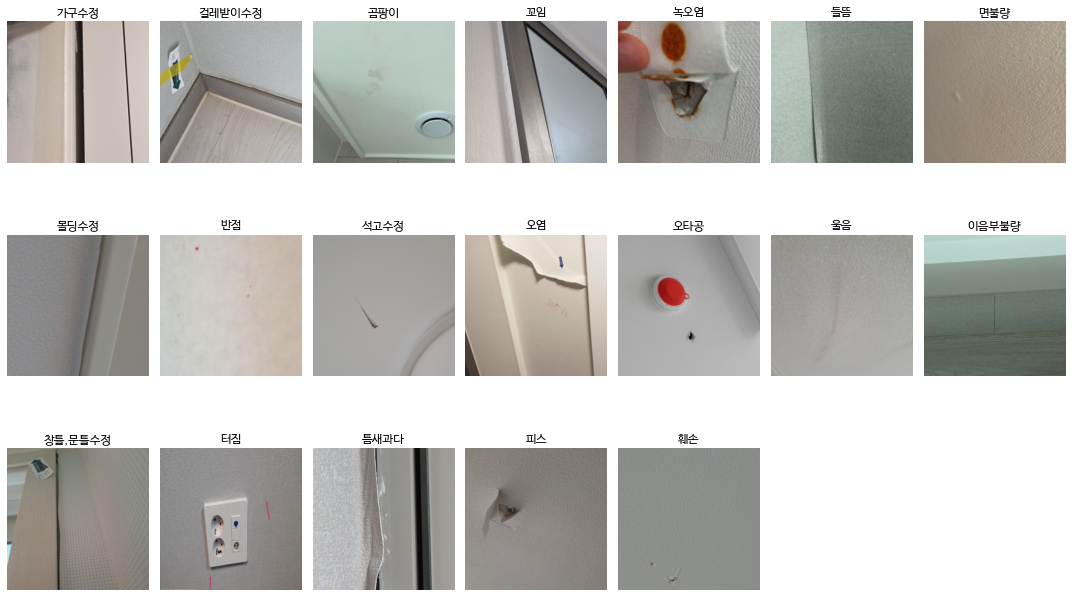

In [11]:
plt.figure(figsize = (15,12))
for idx, i in enumerate(train_df.label.unique()):
    plt.subplot(4, 7, idx+1)
    
    df = train_df[train_df['label'] == i].reset_index(drop = True)
    image_path = df.loc[random.randint(0, len(df))-1, 'path']
    img = Image.open(image_path)
    img = img.resize((224,224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
plt.tight_layout()
plt.show()

In [12]:
def plot_images(df, label):
    plt.figure(figsize = (12,12))
    species_df = df[df['label'] == label].reset_index(drop = True)
    plt.suptitle(label)
    for idx,i in enumerate(np.random.choice(species_df['path'], 32)):
        plt.subplot(8,8,idx+1)
        image_path = i
        img = Image.open(image_path)
        img = img.resize((224,224))
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

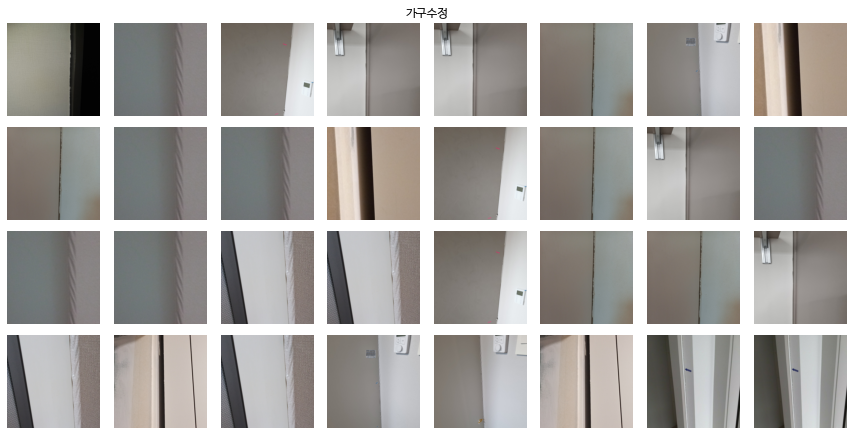

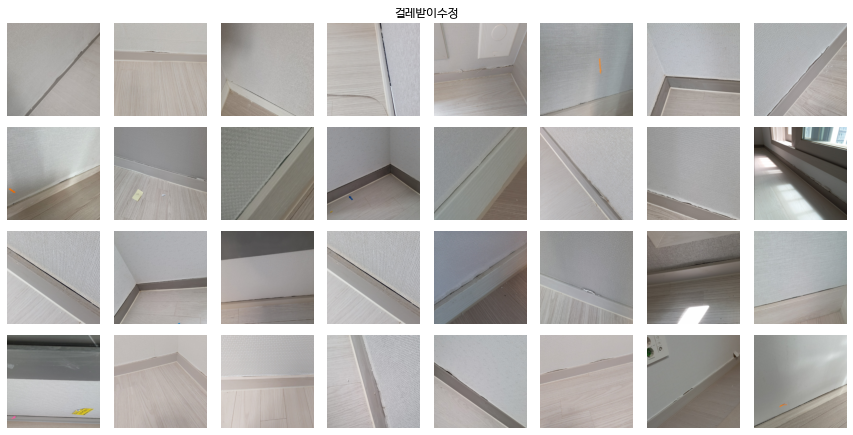

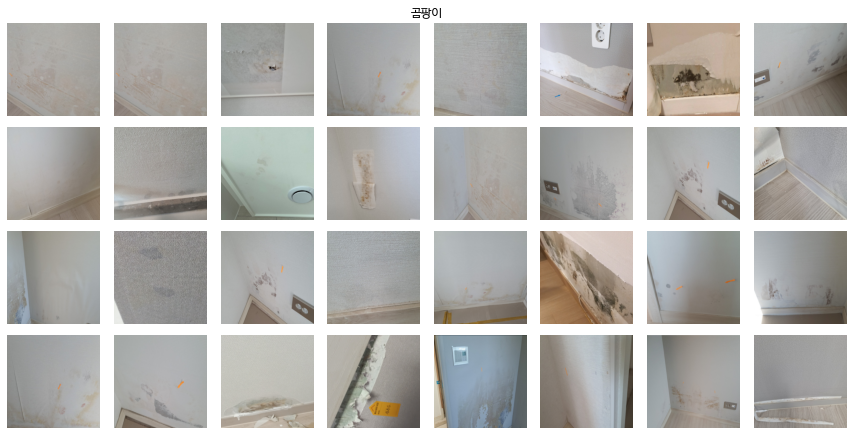

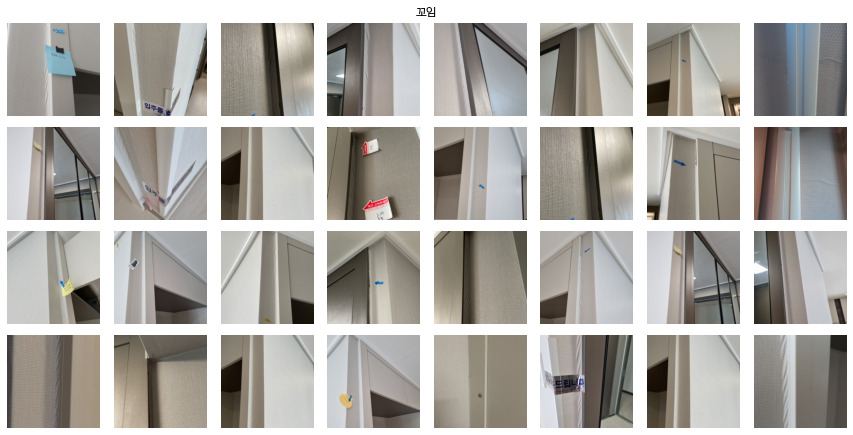

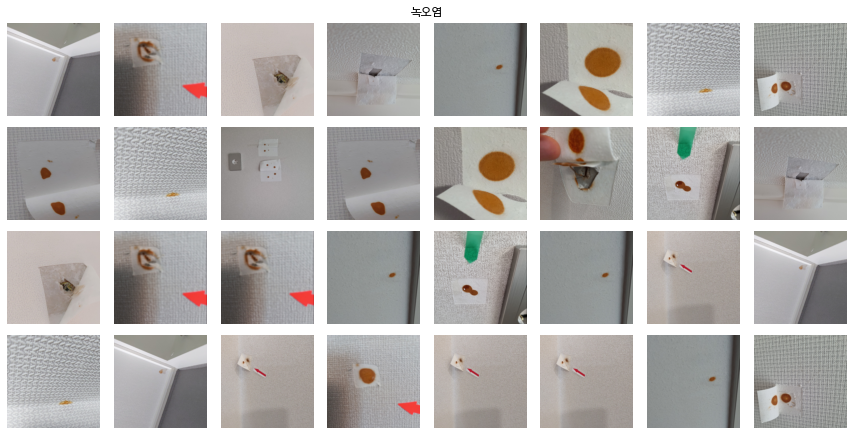

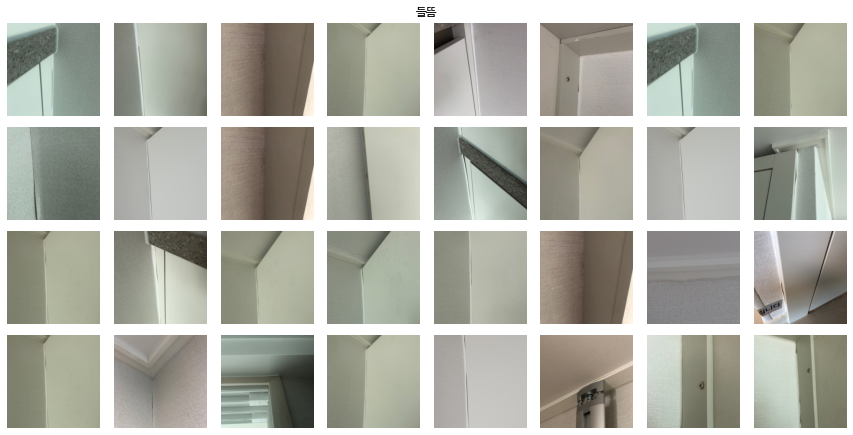

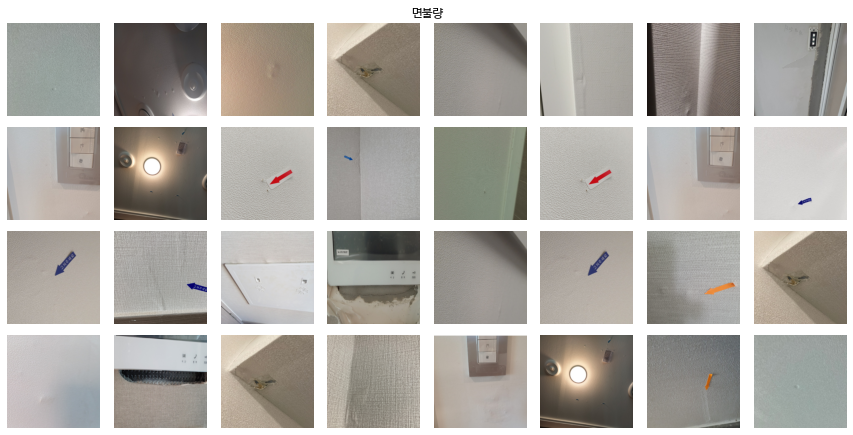

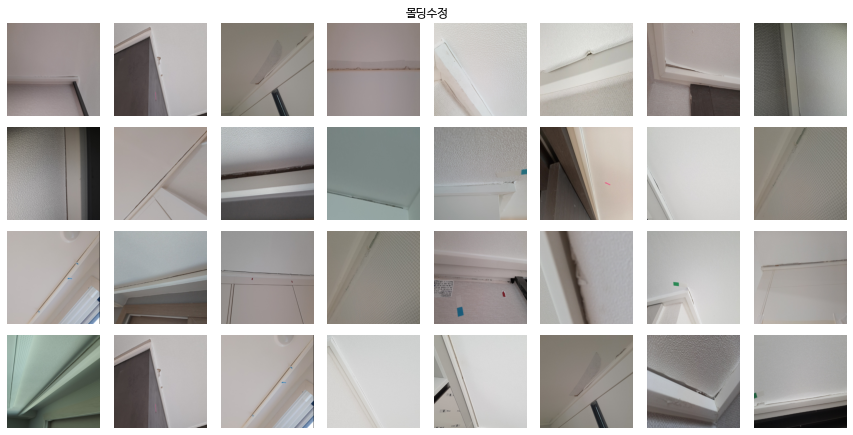

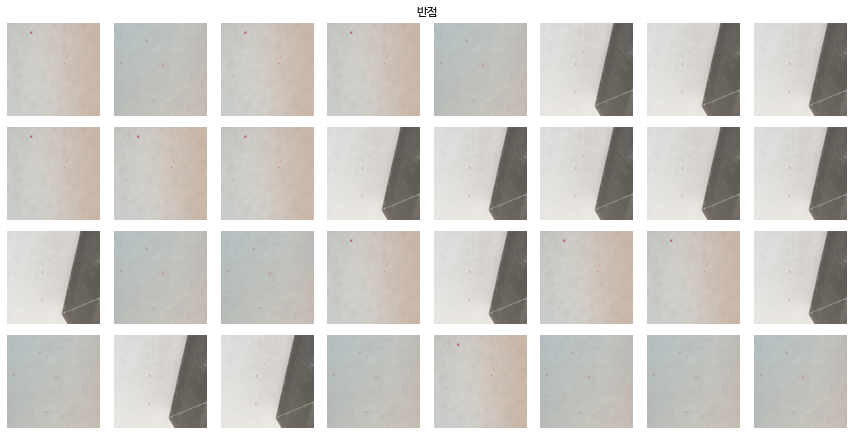

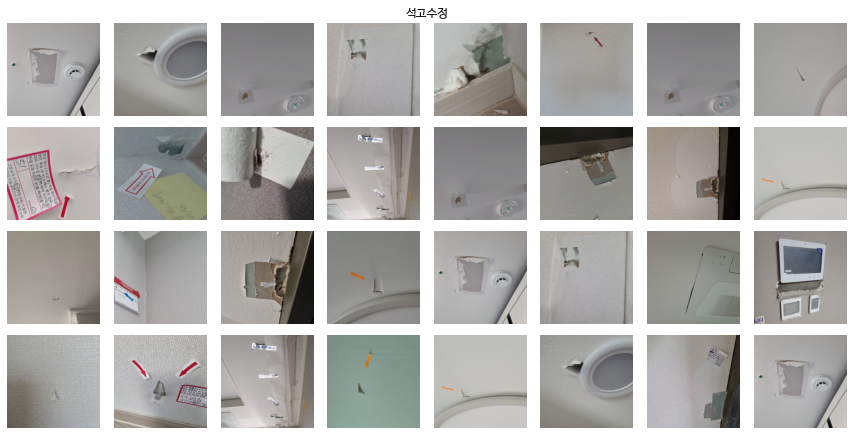

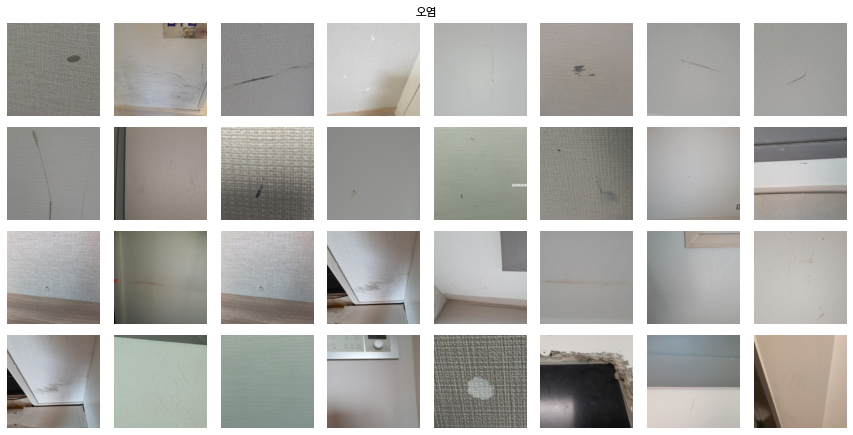

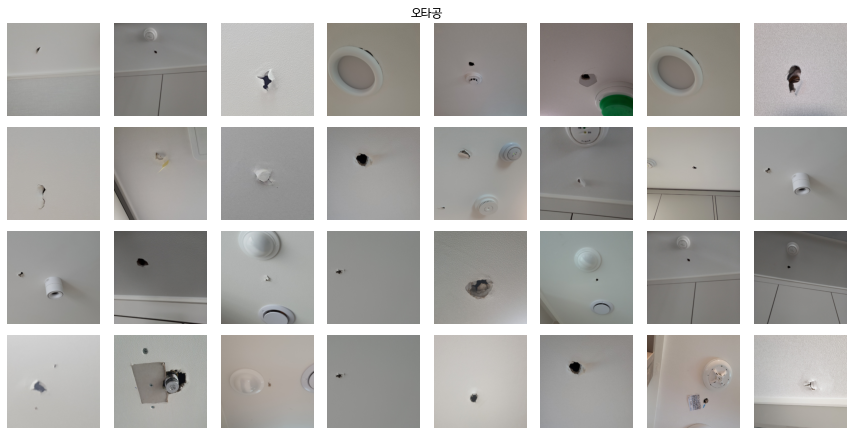

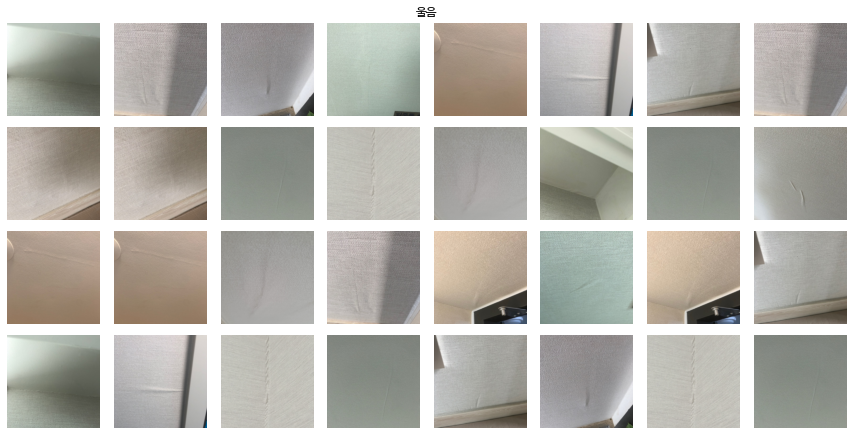

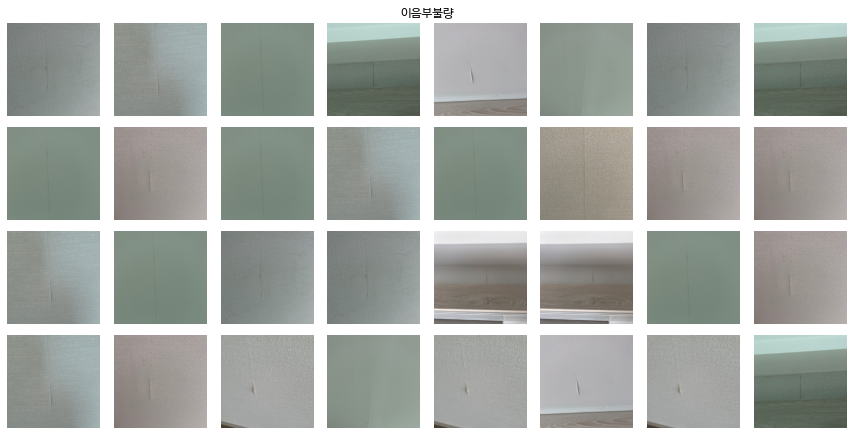

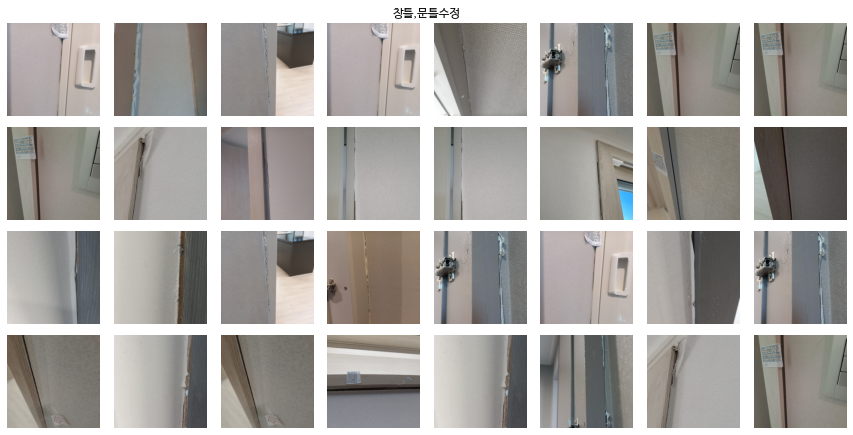

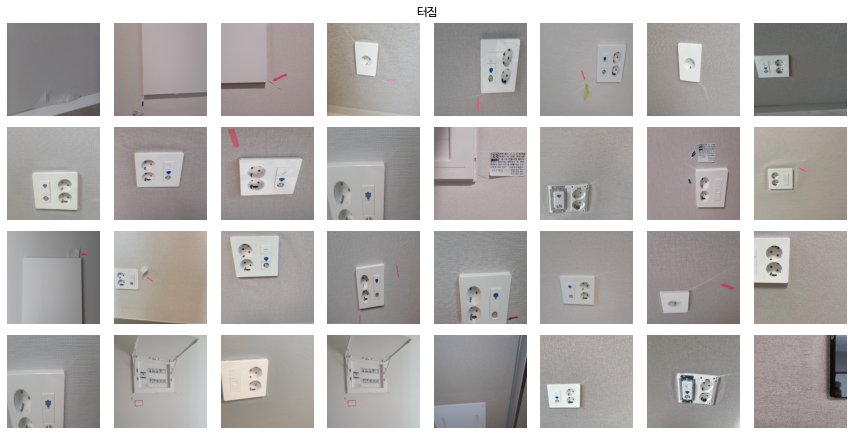

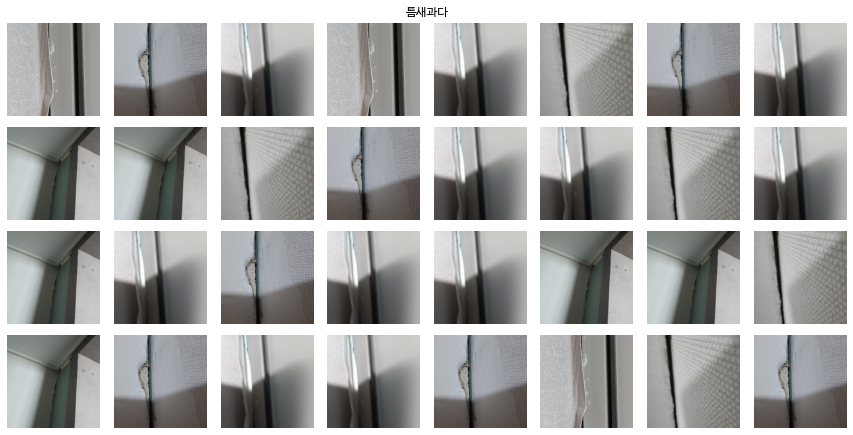

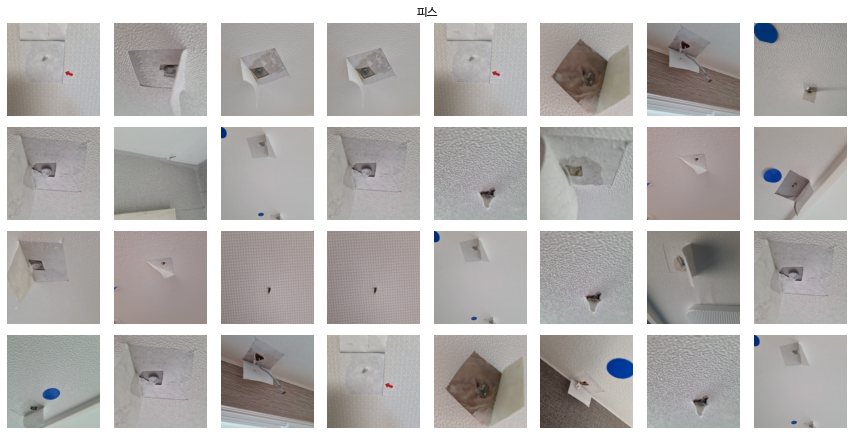

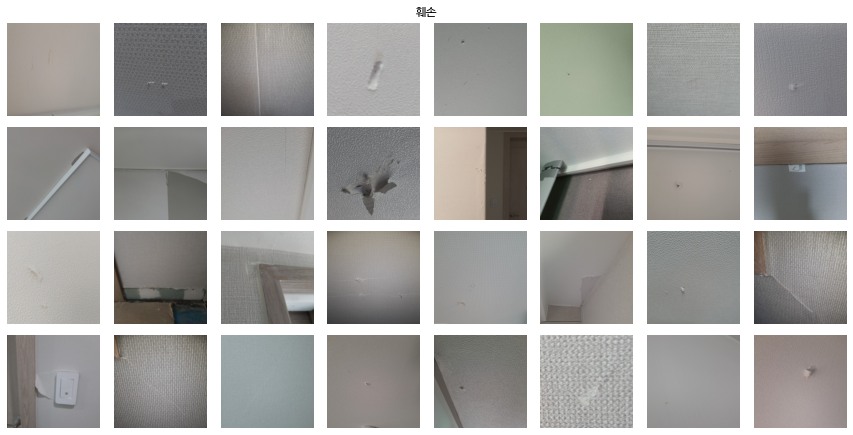

In [13]:
for la in train_df['label'].unique():
    plot_images(train_df , label=la)

# test images without label

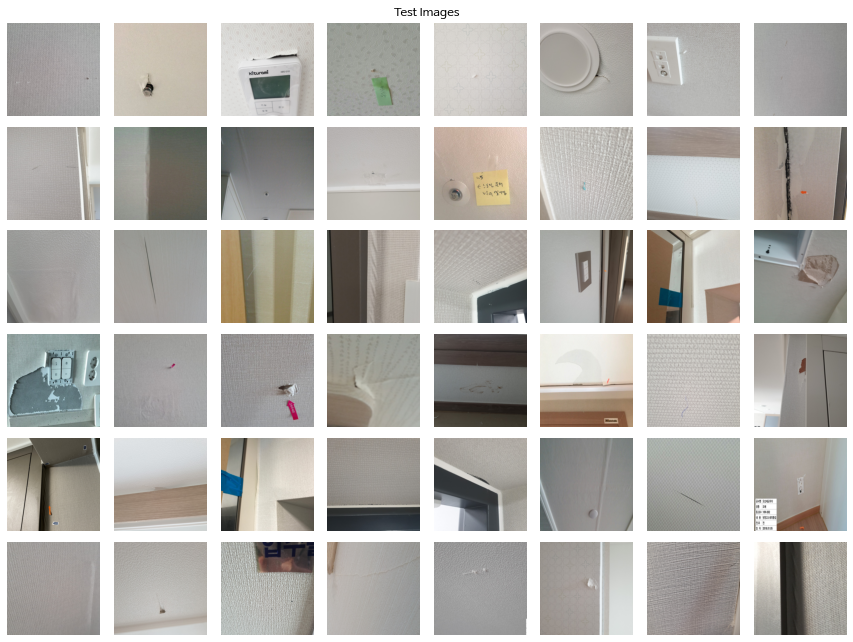

In [14]:
def plot_testimages(df):
    plt.figure(figsize = (12,12))
    plt.suptitle('Test Images')
    for idx,i in enumerate(np.random.choice(df['path'], 48)):
        plt.subplot(8, 8, idx+1)
        image_path = i
        img = Image.open(image_path)
        img = img.resize((224,224))
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_testimages(test_df)

# label count

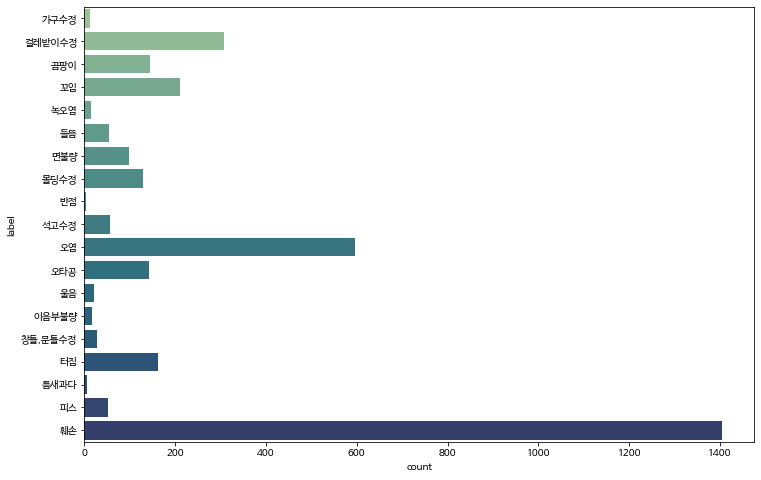

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(data=train_df, y='label',  palette='crest', dodge=False)
plt.show()